In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import logging
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Define file paths
DATASET_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
MODEL_SAVE_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Edge_Layer_LSTM_MultiClass.h5"

# Load dataset
logging.info("Loading dataset for Edge Layer...")
df = pd.read_csv(DATASET_PATH)

# Define selected features for Edge Layer
selected_features = [
    "Fwd IAT Mean", "Bwd IAT Mean", "Flow Byts/s", "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Down/Up Ratio", "Subflow Fwd Pkts", "Hour", "Weekday", "Elapsed_Time"
]

# Encode labels
logging.info("Encoding labels...")
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])

# Split data into features (X) and target (y)
X = df[selected_features]
y = df["Label"]

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input to fit LSTM (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define LSTM model
logging.info("Building LSTM model...")
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(len(label_encoder.classes_), activation="softmax")  # Multi-class classification
])

# Compile model
lstm_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train model with timing
logging.info("Training Edge Layer LSTM model...")
start_time = time.time()
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)
training_time = time.time() - start_time
logging.info(f"Model training completed in {training_time:.2f} seconds.")

# Evaluate model
logging.info("Evaluating Edge Layer LSTM model...")
y_pred = np.argmax(lstm_model.predict(X_test), axis=1)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
logging.info("\n" + report)

# Save the model
lstm_model.save(MODEL_SAVE_PATH)
logging.info(f"Model saved successfully at: {MODEL_SAVE_PATH}")

2025-03-17 19:38:36,178 - INFO - Loading dataset for Edge Layer...
2025-03-17 19:38:45,809 - INFO - Encoding labels...
2025-03-17 19:38:46,568 - INFO - Building LSTM model...
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-03-17 19:38:46,685 - INFO - Training Edge Layer LSTM model...


Epoch 1/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9658 - loss: 0.1171 - val_accuracy: 0.9697 - val_loss: 0.0707
Epoch 2/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9697 - loss: 0.0725 - val_accuracy: 0.9697 - val_loss: 0.0710
Epoch 3/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 27s 940us/step - accuracy: 0.9697 - loss: 0.0715 - val_accuracy: 0.9698 - val_loss: 0.0701
Epoch 4/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 28s 997us/step - accuracy: 0.9696 - loss: 0.0713 - val_accuracy: 0.9697 - val_loss: 0.0704
Epoch 5/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9698 - loss: 0.0711 - val_accuracy: 0.9698 - val_loss: 0.0698
Epoch 6/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9695 - loss: 0.0711 - val_accuracy: 0.9698 - val_loss: 0.0700
Epoch 7/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9700 - loss: 0.0703 - val_accuracy: 0.9698 - val_loss: 0.0698
Epoch 8/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - accura

2025-03-17 20:03:22,955 - INFO - Model training completed in 1476.27 seconds.
2025-03-17 20:03:22,955 - INFO - Evaluating Edge Layer LSTM model...


14190/14190 ━━━━━━━━━━━━━━━━━━━━ 4s 259us/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2025-03-17 20:03:28,645 - INFO - 
   

In [17]:
# Save the original LSTM model in the recommended `.keras` format
MODEL_SAVE_PATH_NEW = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Edge_Layer_LSTM_Original.keras"

# Save in the new Keras format
lstm_model.save(MODEL_SAVE_PATH_NEW)

# Log confirmation
logging.info(f"Original Edge Layer LSTM model saved successfully in Keras format at: {MODEL_SAVE_PATH_NEW}")

2025-03-17 21:23:34,992 - INFO - Original Edge Layer LSTM model saved successfully in Keras format at: /Users/akashthanneeru/Desktop/INADS_Data/Models/Edge_Layer_LSTM_Original.keras


In [15]:
"""
Edge Layer - Optimized LSTM Model Training Script
-------------------------------------------------
This script trains an optimized LSTM model for the Edge Layer of the INADS architecture.
It includes:
1. Data loading and preprocessing
2. Label encoding
3. Feature scaling and transformation
4. Model architecture with LSTM and Batch Normalization
5. Training with appropriate logging
6. Model evaluation and performance reporting
7. Model saving in a structured format

Developed for real-time anomaly detection in a multi-layered network security architecture.
"""

import numpy as np
import pandas as pd
import tensorflow as tf
import time
import logging
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Configure structured logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.StreamHandler(),
        logging.FileHandler("Edge_Layer_LSTM_Training.log")
    ]
)

# Define file paths for dataset and model saving
DATASET_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
MODEL_SAVE_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Edge_Layer_LSTM_Optimized.keras"

# Load dataset
logging.info("Loading dataset for Edge Layer...")
df = pd.read_csv(DATASET_PATH)

# Define selected features for Edge Layer
selected_features = [
    "Fwd IAT Mean", "Bwd IAT Mean", "Flow Byts/s", "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Down/Up Ratio", "Subflow Fwd Pkts", "Hour", "Weekday", "Elapsed_Time"
]

# Encode labels for multi-class classification
logging.info("Encoding labels...")
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])

# Extract features (X) and target labels (y)
X = df[selected_features]
y = df["Label"]

# Standardize feature values for consistency
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input to fit LSTM input format (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define optimized LSTM model using Keras Functional API
logging.info("Building Optimized LSTM model for Edge Layer...")
input_layer = Input(shape=(1, X_train.shape[2]))

# First LSTM layer with Batch Normalization and Dropout
x = LSTM(64, return_sequences=True)(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Second LSTM layer with Batch Normalization and Dropout
x = LSTM(32, return_sequences=False)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Fully connected dense layers for classification
x = Dense(32, activation="relu")(x)
output_layer = Dense(len(label_encoder.classes_), activation="softmax")(x)

# Define the model
lstm_model = Model(inputs=input_layer, outputs=output_layer)

# Compile model with Adam optimizer and categorical crossentropy loss
lstm_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model with logging
logging.info("Training Optimized Edge Layer LSTM model...")
start_time = time.time()
history = lstm_model.fit(
    X_train, y_train,
    epochs=50, batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)
training_time = time.time() - start_time
logging.info(f"Model training completed in {training_time:.2f} seconds.")

# Evaluate model performance
logging.info("Evaluating Edge Layer LSTM model...")
y_pred = np.argmax(lstm_model.predict(X_test), axis=1)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
logging.info("\n" + report)

# Save the trained model
lstm_model.save(MODEL_SAVE_PATH)
logging.info(f"Model saved successfully at: {MODEL_SAVE_PATH}")

2025-03-17 20:50:16,853 - INFO - Loading dataset for Edge Layer...
2025-03-17 20:50:28,621 - INFO - Encoding labels...
2025-03-17 20:50:29,466 - INFO - Building Optimized LSTM model for Edge Layer...
2025-03-17 20:50:29,591 - INFO - Training Optimized Edge Layer LSTM model...


Epoch 1/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9624 - loss: 0.1127 - val_accuracy: 0.9697 - val_loss: 0.0705
Epoch 2/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9697 - loss: 0.0741 - val_accuracy: 0.9698 - val_loss: 0.0705
Epoch 3/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9699 - loss: 0.0728 - val_accuracy: 0.9698 - val_loss: 0.0703
Epoch 4/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9697 - loss: 0.0727 - val_accuracy: 0.9698 - val_loss: 0.0702
Epoch 5/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.9697 - loss: 0.0727 - val_accuracy: 0.9698 - val_loss: 0.0705
Epoch 6/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9699 - loss: 0.0720 - val_accuracy: 0.9698 - val_loss: 0.0699
Epoch 7/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9697 - loss: 0.0721 - val_accuracy: 0.9698 - val_loss: 0.0700
Epoch 8/50
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 

2025-03-17 21:19:04,521 - INFO - Model training completed in 1714.93 seconds.
2025-03-17 21:19:04,521 - INFO - Evaluating Edge Layer LSTM model...


14190/14190 ━━━━━━━━━━━━━━━━━━━━ 4s 279us/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2025-03-17 21:19:09,864 - INFO - 
   

python(28221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025-03-17 22:37:25,823 - INFO - Loading dataset for Edge Layer analysis...
2025-03-17 22:37:38,165 - INFO - Loading Edge Layer LSTM model...
2025-03-17 22:37:38,266 - INFO - Extracting LSTM hidden states...


70948/70948 ━━━━━━━━━━━━━━━━━━━━ 11s 150us/step


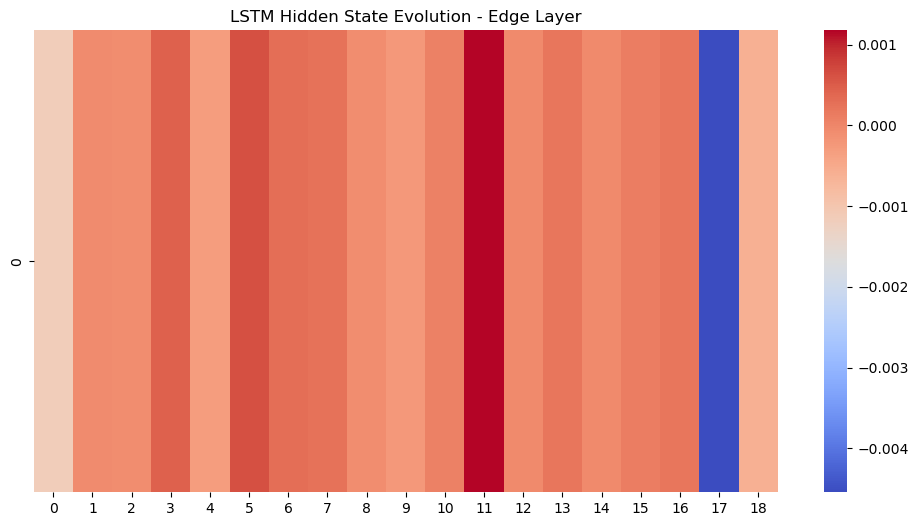

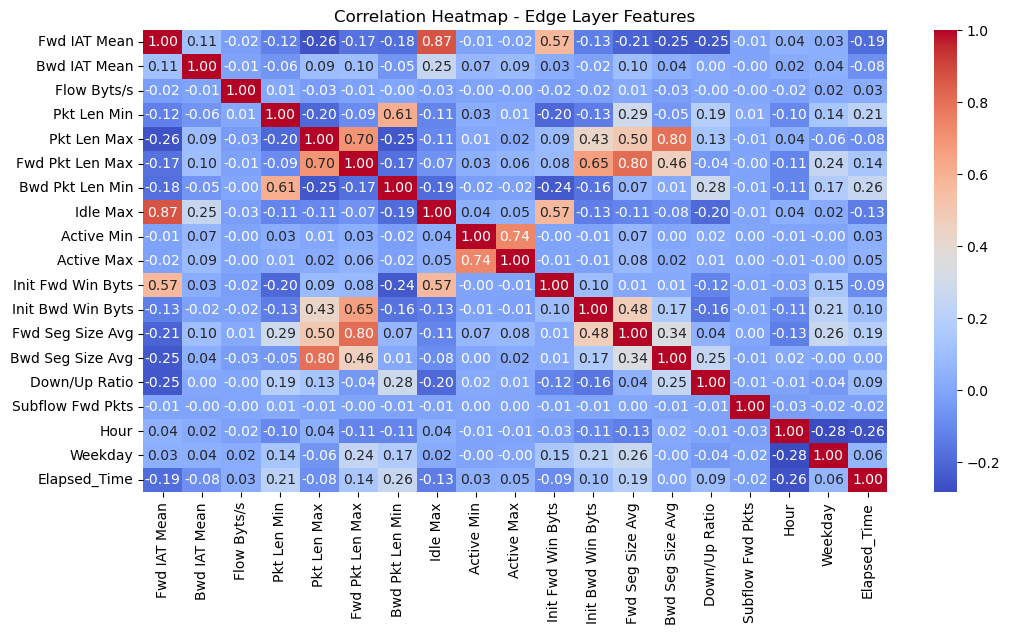

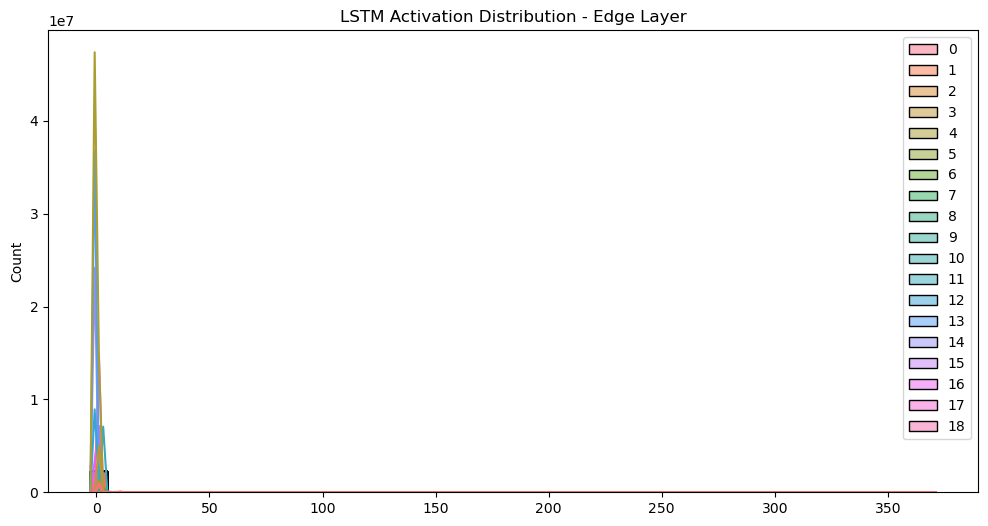

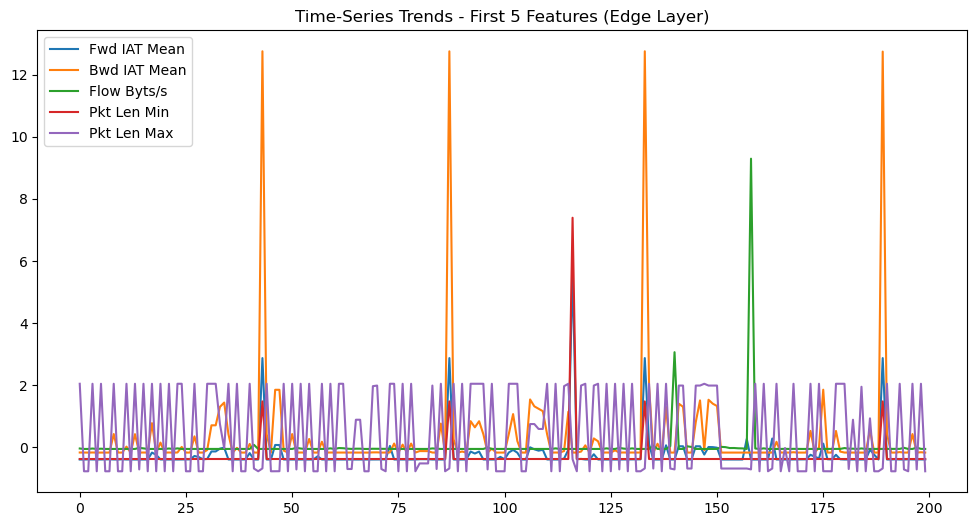

2025-03-17 22:38:50,023 - INFO - Edge Layer analysis complete.


In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File Paths
EDGE_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Edge_Layer_LSTM_MultiClass.keras"
DATASET_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load dataset
logging.info("Loading dataset for Edge Layer analysis...")
df = pd.read_csv(DATASET_PATH)

# Selected features for Edge Layer
EDGE_FEATURES = [
    "Fwd IAT Mean", "Bwd IAT Mean", "Flow Byts/s", "Pkt Len Min", "Pkt Len Max",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Down/Up Ratio", "Subflow Fwd Pkts", "Hour", "Weekday", "Elapsed_Time"
]

# Standardize features
scaler = StandardScaler()
df[EDGE_FEATURES] = scaler.fit_transform(df[EDGE_FEATURES])

# Load Edge Layer Model
logging.info("Loading Edge Layer LSTM model...")
edge_model = load_model(EDGE_MODEL_PATH)

# ===================== Extracting LSTM Hidden States =====================
def extract_lstm_hidden_states(model, X):
    """
    Extracts the hidden states from the first LSTM layer.
    """
    extractor = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
    return extractor.predict(X)

logging.info("Extracting LSTM hidden states...")
X_edge = np.expand_dims(df[EDGE_FEATURES].values, axis=1)
lstm_hidden_states = extract_lstm_hidden_states(edge_model, X_edge)

# ===================== Visualizing LSTM Hidden State Evolution =====================
plt.figure(figsize=(12, 6))
sns.heatmap(lstm_hidden_states.mean(axis=0), cmap='coolwarm', annot=False)
plt.title("LSTM Hidden State Evolution - Edge Layer")
plt.show()

# ===================== Feature Correlation Heatmap =====================
plt.figure(figsize=(12, 6))
sns.heatmap(df[EDGE_FEATURES].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Edge Layer Features")
plt.show()

# ===================== LSTM Activation Distribution =====================
activation_means = np.mean(lstm_hidden_states, axis=1)

plt.figure(figsize=(12, 6))
sns.histplot(activation_means, bins=50, kde=True, color='blue')
plt.title("LSTM Activation Distribution - Edge Layer")
plt.show()

# ===================== Time-Series Feature Trends =====================
# Select a sample of time-series data for visualization
time_window = 200  # Select the first 200 samples to observe trends

plt.figure(figsize=(12, 6))
for feature in EDGE_FEATURES[:5]:  # Plot the first 5 features
    plt.plot(df[feature][:time_window], label=feature)

plt.legend()
plt.title("Time-Series Trends - First 5 Features (Edge Layer)")
plt.show()

logging.info("Edge Layer analysis complete.")

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)

# Define Edge Layer features
edge_features = [
    "Pkt Len Min", "Pkt Len Max", 
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", 
    "Fwd Pkts/s", "Bwd Pkts/s", 
    "Fwd IAT Mean"
]

# Selecting features and label
X = df[edge_features]
y = df["Label"]  # Target variable

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to categorical format
y_categorical = to_categorical(y_encoded)

# ** Reshape for LSTM (Sliding Window) **
sequence_length = 5  # Define sequence length (timesteps per sample)
num_samples = X_scaled.shape[0] - sequence_length + 1

# Create sliding windows
X_lstm = np.array([X_scaled[i:i+sequence_length] for i in range(num_samples)])
y_lstm = np.array([y_categorical[i+sequence_length-1] for i in range(num_samples)])

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42, stratify=y_encoded[:num_samples])

# ** Define LSTM Model **
model = Sequential([
    
    LSTM(128, return_sequences=True, input_shape=(sequence_length, len(edge_features))),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Multi-class classification
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ** Implement Early Stopping & Checkpoint **
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("edge_layer_lstm_best.h5", monitor='val_accuracy', save_best_only=True)

# ** Train Model **
print("Training LSTM Model for Edge Layer...")
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, checkpoint])

# ** Evaluate Model **
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Edge Layer LSTM Model Accuracy: {test_acc:.4f}")

# Load Best Model
model.load_weights("edge_layer_lstm_best.h5")

# ** Display Classification Report **
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

Training LSTM Model for Edge Layer...
Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28379/28379 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9554 - loss: 0.1712

28379/28379 ━━━━━━━━━━━━━━━━━━━━ 156s 5ms/step - accuracy: 0.9554 - loss: 0.1712 - val_accuracy: 0.9664 - val_loss: 0.1244
Epoch 2/15
28373/28379 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9662 - loss: 0.1242

28379/28379 ━━━━━━━━━━━━━━━━━━━━ 144s 5ms/step - accuracy: 0.9662 - loss: 0.1242 - val_accuracy: 0.9671 - val_loss: 0.1200
Epoch 3/15
28372/28379 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9672 - loss: 0.1192

28379/28379 ━━━━━━━━━━━━━━━━━━━━ 149s 5ms/step - accuracy: 0.9672 - loss: 0.1192 - val_accuracy: 0.9676 - val_loss: 0.1164
Epoch 4/15
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 145s 5ms/step - accuracy: 0.9677 - loss: 0.1166 - val_accuracy: 0.9665 - val_loss: 0.1190
Epoch 5/15
28370/28379 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9677 - loss: 0.1156

28379/28379 ━━━━━━━━━━━━━━━━━━━━ 143s 5ms/step - accuracy: 0.9677 - loss: 0.1156 - val_accuracy: 0.9681 - val_loss: 0.1137
Epoch 6/15
28378/28379 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9681 - loss: 0.1139

28379/28379 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - accuracy: 0.9681 - loss: 0.1139 - val_accuracy: 0.9683 - val_loss: 0.1135
Epoch 7/15
28372/28379 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9681 - loss: 0.1137

28379/28379 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - accuracy: 0.9681 - loss: 0.1137 - val_accuracy: 0.9685 - val_loss: 0.1124
Epoch 8/15
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 137s 5ms/step - accuracy: 0.9682 - loss: 0.1126 - val_accuracy: 0.9684 - val_loss: 0.1127
Epoch 9/15
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 136s 5ms/step - accuracy: 0.9682 - loss: 0.1128 - val_accuracy: 0.9684 - val_loss: 0.1126
Epoch 10/15
28370/28379 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9685 - loss: 0.1117

28379/28379 ━━━━━━━━━━━━━━━━━━━━ 136s 5ms/step - accuracy: 0.9685 - loss: 0.1117 - val_accuracy: 0.9686 - val_loss: 0.1118
Epoch 11/15
28372/28379 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9684 - loss: 0.1116

28379/28379 ━━━━━━━━━━━━━━━━━━━━ 147s 5ms/step - accuracy: 0.9684 - loss: 0.1116 - val_accuracy: 0.9687 - val_loss: 0.1112
Epoch 12/15
28377/28379 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9684 - loss: 0.1112

28379/28379 ━━━━━━━━━━━━━━━━━━━━ 145s 5ms/step - accuracy: 0.9684 - loss: 0.1112 - val_accuracy: 0.9687 - val_loss: 0.1114
Epoch 13/15
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - accuracy: 0.9684 - loss: 0.1110 - val_accuracy: 0.9687 - val_loss: 0.1112
Epoch 14/15
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 144s 5ms/step - accuracy: 0.9685 - loss: 0.1103 - val_accuracy: 0.9685 - val_loss: 0.1114
Epoch 15/15
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 793s 28ms/step - accuracy: 0.9687 - loss: 0.1100 - val_accuracy: 0.9686 - val_loss: 0.1112
14190/14190 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9688 - loss: 0.1106
Edge Layer LSTM Model Accuracy: 0.9686


FileNotFoundError: [Errno 2] No such file or directory: 'edge_layer_lstm_best.keras'

In [12]:
# Load Best Model
model.load_weights("edge_layer_lstm_best.h5")

# ** Display Classification Report **
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

14190/14190 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                         precision    recall  f1-score   support

                Benign       0.96      1.00      0.98    314699
      Brute Force -Web       0.92      0.85      0.88        71
      Brute Force -XSS       0.93      0.90      0.91        29
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115236
 DoS attacks-GoldenEye       0.99      0.97      0.98      8246
 DoS attacks-Slowloris       0.92      0.96      0.94      2101
         Infilteration       0.00      0.00      0.00     13681

              accuracy                           0.97    454063
             macro avg       0.82      0.81      0.81    454063
          weighted avg       0.94      0.97      0.95    454063



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
